<a href="https://colab.research.google.com/github/August13CMD/Diplomado/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En el archivo se encuentran 10 variables económicas y sociales asociadas a 21 paìses.

Se usaran esas variables para visualizar países con comportamientos similares.

Se busca proyectar los puntos de información en el plano, de forma que podamos perder la menos cantidad de información posible.

Para eso, se calcularán las componentes principales, y proyectar en el plano las dos componentes principales más importantes.


In [1]:
#para leer datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from google.colab import drive


In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/My \Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [9]:
datos = pd.read_csv("paises.csv") #crear el dataFrame
print(datos)

            pais   x1   x2  x3      x4      x5   x6    x7  x8   x9   x10
0        albania  1.0   30  41    2199    3903   12    94  53  0.0   341
1         angola  3.0  124  46    4422     955    6    57  19  0.7    89
2   arabia saudi  4.3   21  13  133540   91019   96   497   1  0.0  4566
3        argelia  2.5   34  24   44609   19883   42   180   2  0.8   906
4      argentina  1.3   22  31  278431   65962  160  1043  22  0.1  1504
5      australia  1.4    6  43  337909  167155  510   933  19  0.0  5341
6        austria  0.6    6  41  216547   53259  465   304  47 -0.4  3301
7     bangladesh  2.0   79  42   28599    9891    2   220   6  4.1    64
8       belgica   0.3    8  40  250710   72236  457   917  20 -0.3  5120
9          benin  3.0   95  48    2034       6    5    26  45  1.3    20
10     tailandia  1.3   35  46  159630   71177   59   602  25  3.5   769
11      tanzania  3.1   82  49    3703    1913    3    40  38  1.2    34
12         tunez  2.1   39  30   16369    6714   58

Las variables corresponden a lo siguiente:

x1= Tasa anual de crecimiento de la población

x2= Tasa de mortalidad infantil por cada 1000 nacidos vivos.

x3= Porcentaje de mujeres en la población activa

x4=PIB

x5= Producción de electricidad

x6= Lineas telefonicas por cada 1000 habitantes

x7= Consumo de agua

x8= Proporcion de la superficie del pais cubierta por bosques

x9= Proporción de deforestación anual

x10= Consumo de energía

Lo que queremos es representar todas las variables en el plano, para recavar información representativa a cerca de ellas, por lo cual aplicaremos PCA a las variables de esta base de datos.

En este ejemplo, podemos tomar una variable que sea económica y una variable que sea social para distinguir lo mas posible de información con dos variables unicamente, pero al mismo tiempo si no sabemos del tema o no somos expertos, podemos perder información de alguna variable que hayamos decidido no utilizar pero era importante.

Componentes principales para este ejercicio será crear dos nuevas variables, es decir, no usar las 10 variables que ya tenemos y que estas dos variables nuevas, sean COMBINACIONES LINEALES de las otras 10 variables y que por supuesto, tengan la mayor información posible de las otras variables, es decir, que representen la mayor variación posible



In [ ]:
#Convertimos los datos a np.array
#numpy me aceptara la columna del nombre de los paises y la identificara como caracteres
datosNP = datos.to_numpy()
print(datosNP)

[['albania' 1.0 30 41 2199 3903 12 94 53 0.0 341]
 ['angola' 3.0 124 46 4422 955 6 57 19 0.7 89]
 ['arabia saudi' 4.3 21 13 133540 91019 96 497 1 0.0 4566]
 ['argelia' 2.5 34 24 44609 19883 42 180 2 0.8 906]
 ['argentina' 1.3 22 31 278431 65962 160 1043 22 0.1 1504]
 ['australia' 1.4 6 43 337909 167155 510 933 19 0.0 5341]
 ['austria' 0.6 6 41 216547 53259 465 304 47 -0.4 3301]
 ['bangladesh' 2.0 79 42 28599 9891 2 220 6 4.1 64]
 ['belgica ' 0.3 8 40 250710 72236 457 917 20 -0.3 5120]
 ['benin' 3.0 95 48 2034 6 5 26 45 1.3 20]
 ['tailandia' 1.3 35 46 159630 71177 59 602 25 3.5 769]
 ['tanzania' 3.1 82 49 3703 1913 3 40 38 1.2 34]
 ['tunez' 2.1 39 30 16369 6714 58 381 4 -1.9 595]
 ['turquia' 1.9 48 35 169452 78322 212 585 26 0.0 957]
 ['ucrania' 0.1 15 49 84084 202995 157 673 16 -0.3 3180]
 ['uruguay' 0.6 18 40 16458 7617 196 241 4 -0.6 629]
 ['venezuela' 2.4 23 33 65382 73116 111 382 52 1.2 2186]
 ['vietnam' 2.2 41 49 17634 12270 11 414 26 1.5 101]
 ['yemen' 4.2 100 29 4044 2159 12 335

In [ ]:
#ejemplo 1

pais = datosNP[:, 0]

#pais sera una matriz que contenga solo el nombre de los paises
#X será una matriz que contenga el resto de la información numerica
X = datosNP[:, 1:11]

#lo que queremos es llevar todos los valores a la misma escala para poder analizarlos
# y poder comparar la variables, es decir, si alguna variable tiene un valor "alto", queremos
# que ese valor sea alto para todas para que asi toda la información sea comparable


#para ello, necesitamos una estandarización, para asi llevar todas las variables a un mismo rango
#llevaremos todos los datos a media 0 y varianza 1 (que los valores no se dispersen mucho)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
print(X)

[[-0.90222646 -0.4823389   0.22284879 -0.82502775 -0.75494886 -0.70342843
  -1.00917777  1.77658586 -0.46612489 -0.64242932]
 [ 0.8440183   2.16248609  0.76701443 -0.80362013 -0.80844199 -0.74124071
  -1.13419868 -0.28934623  0.07340549 -0.78812188]
 [ 1.9790774  -0.73556683 -2.8244788   0.43979377  0.82582026 -0.17405652
   0.35253643 -1.38307499 -0.46612489  1.80023369]
 [ 0.40745711 -0.36979316 -1.62731439 -0.41661697 -0.46498272 -0.51436703
  -0.71858864 -1.32231228  0.15048126 -0.31577734]
 [-0.64028975 -0.70743039 -0.86548249  1.83510258  0.37114681  0.22927445
   2.19743955 -0.10705811 -0.38904912  0.02995342]
 [-0.55297751 -1.15761337  0.44051504  2.4078792   2.20735106  2.43499072
   1.82575577 -0.28934623 -0.46612489  2.24829613]
 [-1.25147541 -1.15761337  0.22284879  1.23915603  0.14064369  2.15139863
  -0.29959965  1.41200961 -0.77442796  1.06888015]
 [-0.02910408  0.89634646  0.33168191 -0.5707942  -0.64629321 -0.76644889
  -0.5834309  -1.07926144  2.69398162 -0.80257551]


Podemos observar que todos los valores los podemos vizualizar entre -1 y 1 aproximadamente, por la estandarización que previamente hicimos por la varianza de 1.

Los valores podemos decir que quedaron adaptados a una misma escala y si sumaramos todas las columnas, buscarian acercarse a 0, cosa que no hubiera pasado con los valores originales de cada columna.


In [ ]:
print(sum(X))

[-5.21804822e-15 -1.55431223e-15  7.43849426e-15  1.22124533e-15
  9.99200722e-16  4.44089210e-16 -1.44328993e-15 -7.97972799e-16
  2.69229083e-15  7.77156117e-16]


Antes de aplicar PCA, analizamos la información de dos variables.

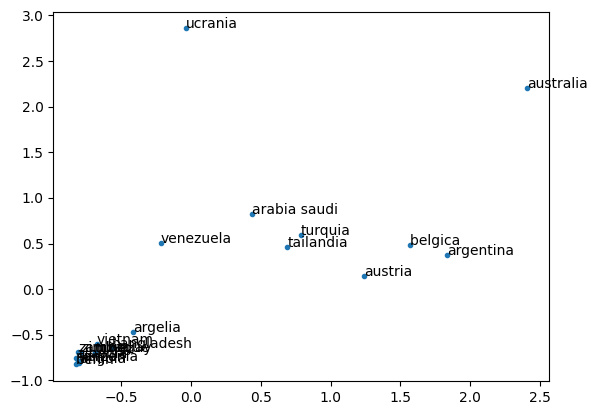

In [ ]:
#graficamos información de dos variables

x = X[:, 3] #PIB
y = X[:, 4] #Producción de electricidad
plt.plot(x, y, ".")

for label, x, y in zip(pais, x, y):
    plt.annotate(
      label,
      xy=(x,y))

plt.show()

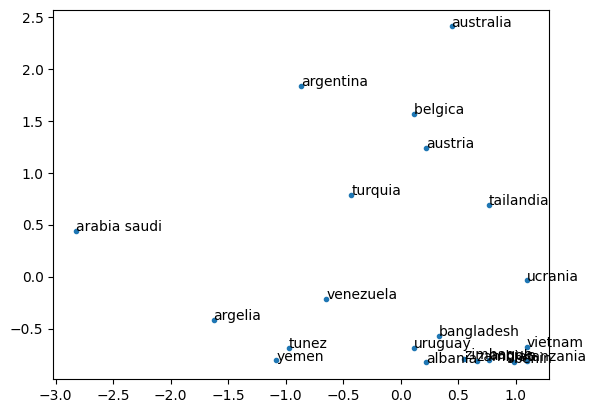

In [ ]:
#graficamos información de dos variables distintas al ejemplo anterior

x = X[:, 2]
y = X[:, 3]
plt.plot(x, y, ".")

for label, x, y in zip(pais, x, y):
    plt.annotate(
      label,
      xy=(x,y))

plt.show()

Podemos notar la correlación que existe entre ambas variables, y suena incluso logico que un pais que tenga un PIB alto, tenga mayor producción de electricidad.

Ahora pensemos en PCA, elegir dos variables que representen de la mejor manera posible toda la información, en el primer ejemplo que vimos, no sería buena opción elegir esas dos variables porque se nota que existe correlación entre ambas y nos gustaria observar un grafico lo más disperso posible para tratar de abarcar la mayor informacion de variables.

En el segundo ejemplo podemos notar una mayor dispersión en los datos cuando cambiamos el par de variables a analizar.

ahora trataremos de capturar la información de las 10 variables en solo dos variables, es decir, aplicar PCA

In [ ]:
#Calculamos las dos componentes principales para 10 variables

from sklearn.decomposition import PCA

#primero decimos cuantas componentes queremos hacer
pca =PCA(n_components=2)

#fit_transform nos transforma todos los datos de la matriz X a dos componentes usando PCA

principalComponents = pca.fit_transform(X)
print(principalComponents)

[[-1.13731946 -1.30939831]
 [-2.73902253 -0.01121435]
 [ 1.3950581   3.72389174]
 [-0.72472436  1.95212885]
 [ 2.39038557  0.46960829]
 [ 4.94845972 -0.42212415]
 [ 2.50411655 -1.43537966]
 [-2.07402365 -0.33275026]
 [ 4.08961578 -0.43948794]
 [-2.70210522 -1.11686381]
 [ 0.23041088 -1.40434013]
 [-2.52604468 -0.90038861]
 [-0.34119063  1.87924602]
 [ 1.01632762  0.16769768]
 [ 2.70928687 -1.02374462]
 [ 0.13508855  0.22159994]
 [ 0.25801122 -0.43147859]
 [-1.24734613 -0.84624898]
 [-2.0738309   2.21271265]
 [-2.39113161 -0.92077349]
 [-1.72002169 -0.03269228]]


Nuestra nueva tabla tiene el mismo numero de renglones con dos NUEVAS columnas.

Estas dos nuevas columnas tienen la mayor posible informaión de las otras columnas, las 10 anteriores.

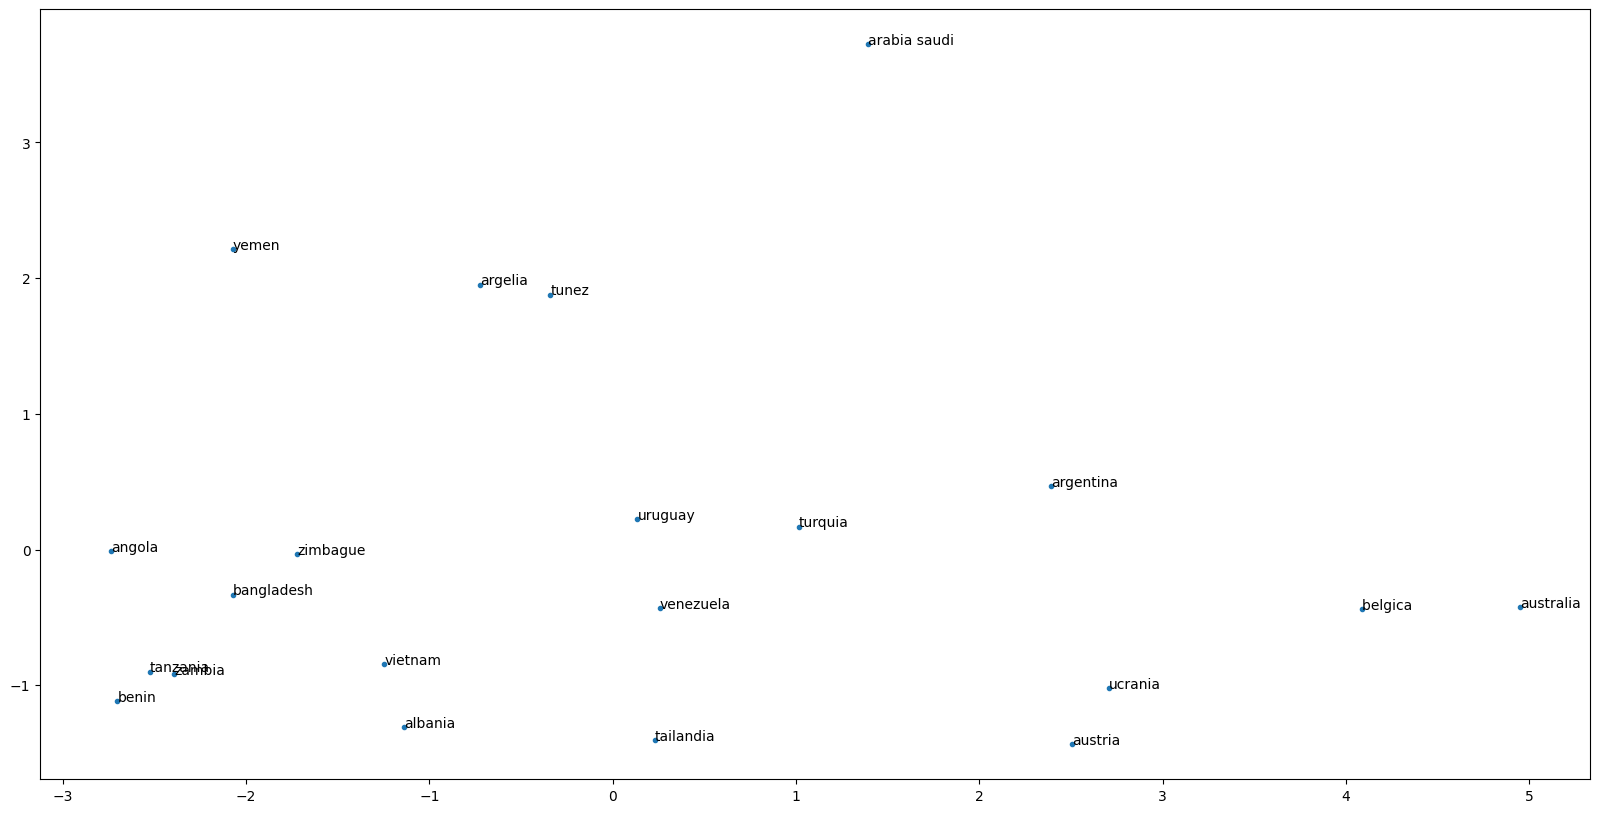

In [ ]:
plt.figure(figsize=(20,10))
x = principalComponents[:, 0]
y = principalComponents[:, 1]
plt.plot(x, y, ".")

for label, x, y in zip(pais, x, y):
    plt.annotate(
      label,
      xy=(x,y))

plt.show()



Enseguida podemos notar una mayor dispersión entre los datos y los países.

La idea fue entonces tener dos variables que demuestren la menor correlación psible.


No existe un principio de interpretación al hacer PCA ya que las nuevas variables son combinaciones lineales de toas las variables anteriores, lo que a nosotros nos gustaria seria hacer algun informe, concluir resultados.

Podemos empezar a hacer algun analisis con lo que tenemos, idintificar nuestras nuevas dos columnas y ver precisamente de qué variables son combinaciones lineales.

In [ ]:
#veamos que variables aparecen más fuertemente en cada componente

pca.components_

array([[-0.26861263, -0.36979007, -0.08374702,  0.39862823,  0.36191038,
         0.3935883 ,  0.38271741, -0.05729598, -0.17785136,  0.39737528],
       [ 0.42269527, -0.00851046, -0.66399579, -0.03896867, -0.05084735,
        -0.11561295,  0.05229771, -0.53193914, -0.26159881,  0.09363369]])

Tenemos dos vectores, cada uno correspondiente a cada columna, es decir, mi primer columna de PCA es una combinación lineal de las 10 variables anteriores con el vector que acabamos de observar.

Los valores más grandes, serán los que tengan mayor peso en la componente 1 (por eso fue importante normalizar todo al principio con la misma media y misma varianza).

Por el analisis que podemos hacer de nuestras 10 variables anteriores con nuestras dos variables nuevas, podriamos decir que PCA de alguna manera separo variables economicas de variables sociales por los datos arrojados.